# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv('data.csv',decimal=",")

In [3]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


Premier constat : il va falloir faire un travail de préparation sur la colonne "Technologies" en faisant un split de la colonne avec comme séparateur "/" afin de pouvoir exploiter cette donnée

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [4]:
df.shape

(9582, 6)

Le dataset comprend 9582 observations (lignes) et 6 variables (colonnes - ce qui correspond bien aux informations décrites dans le paragraphe Données)

In [5]:
#Tableau affichant les données manquantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcentage (%)'])
missing_data

,Total,Pourcentage (%)
Experience,94,0.981006
Metier,19,0.198288
Entreprise,17,0.177416
Ville,0,0.000000
Diplome,0,0.000000
Technologies,0,0.000000


Il y a des données manquantes pour les variables : Experience, Metier et Entreprise. Cependant, le taux de données manquantes n'excédant pas 1%, on est sur des ordres de grandeur relativement faible.

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [6]:
# Au vu de ce qui est demandé, regardons la répartition des valeurs manquantes selon les métiers
df.groupby("Metier")["Experience"].apply(lambda x : x.isnull().sum())

Metier
Data architecte        23
Data engineer          20
Data scientist         32
Lead data scientist    19
Name: Experience, dtype: int64

On constate que tous les métiers sont concernés par des expériences manquantes. Au delà de ce qui est demandé, et pour répondre aux questions suivantes, je fais le choix de la valeur médiane pour les autres métiers. En effet, il semble y avoir des outliers et la médiane est plus robuste dans ce cas.

In [7]:
# Affichons les premières lignes vides afin de vérifier par la suite si les modifications ont été faites correctement
df[["Metier","Experience"]].loc[(df["Experience"].isnull())].head(20)

,Metier,Experience
4,Data scientist,NaN
28,Lead data scientist,NaN
104,Data scientist,NaN
161,Data engineer,NaN
451,Data architecte,NaN
599,Data scientist,NaN
800,Data engineer,NaN
1122,Data engineer,NaN
1150,Lead data scientist,NaN
1251,Lead data scientist,NaN


In [8]:
# Affichons la médiane pour les data scientists
df["Experience"].loc[df["Metier"]=="Data scientist"].median()
        

2.0

In [9]:
# Affichons la médiane pour les lead data scientists
df["Experience"].loc[df["Metier"]=="Lead data scientist"].median()

3.5

In [10]:
# Affichons la médiane pour les data architectes
df["Experience"].loc[df["Metier"]=="Data architecte"].median()

2.5

In [11]:
# Affichons la moyenne pour les data engineers
df["Experience"].loc[df["Metier"]=="Data engineer"].mean()

2.984959174903309

In [12]:
# Remplaçons maintenant les valeurs manquantes
# Pour les data engineer, on arrondit la moyenne avec un chiffre significatif, pour être cohérent avec l'ensemble du dataset
df["Experience"].loc[df["Metier"]=="Data engineer"] = df["Experience"].fillna(3.0)
df["Experience"].loc[df["Metier"]=="Data scientist"] = df["Experience"].fillna(2.0)
df["Experience"].loc[df["Metier"]=="Lead data scientist"] = df["Experience"].fillna(3.5)
df["Experience"].loc[df["Metier"]=="Data architecte"] = df["Experience"].fillna(3.5)

C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
# Vérifions que la modification a bien été prise en compte pour un data scientist pris au hasard
df.iloc[4,:]

Entreprise                                                  Arm
Metier                                           Data scientist
Technologies    Matlab/Python/C++/numpy/Tensorflow/scikit-learn
Diplome                                                     Phd
Experience                                                    2
Ville                                                  Bordeaux
Name: 4, dtype: object

La valeur manquante a bien été complétée par 2.0, la médiane

In [14]:
# Vérifions que la modification a bien été prise en compte pour un data engineer pris au hasard
df.iloc[161,:]

Entreprise                          JLL
Metier                    Data engineer
Technologies    C/C++/Java/Python/Linux
Diplome                          Master
Experience                            3
Ville                          Toulouse
Name: 161, dtype: object

La valeur manquante a bien été complétée par ".0, la moyenne

In [15]:
# Vérifions qu'il ne reste plus de valeur manquante
df.groupby("Metier")["Experience"].apply(lambda x : x.isnull().sum())

Metier
Data architecte        0
Data engineer          0
Data scientist         0
Lead data scientist    0
Name: Experience, dtype: int64

Il n'y a plus de donnée manquante. Les transformations ont marché correctement !

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [16]:
# On fait une aggrégation avec la fonction groupby afin de répondre à la question
df.groupby("Metier")["Experience"].mean()

Metier
Data architecte        3.005888
Data engineer          2.985087
Data scientist         2.241268
Lead data scientist    3.958062
Name: Experience, dtype: float64

Les nombres moyens d'expérience permettent de faire quelques constats qui confirme certaines intuitions qu'on pourrait avoir :
- Les lead data scientists sont en moyenne plus expérimentés que les data scientists
- Les data architect et lead data scientists sont les plus expérimentés (ce sont en effet des postes où il faut avoir une très bonne connaissance de l'écosystème data

### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

In [17]:
y = df.groupby("Metier")["Experience"].mean().values
x = df.groupby("Metier")["Experience"].mean().index.values

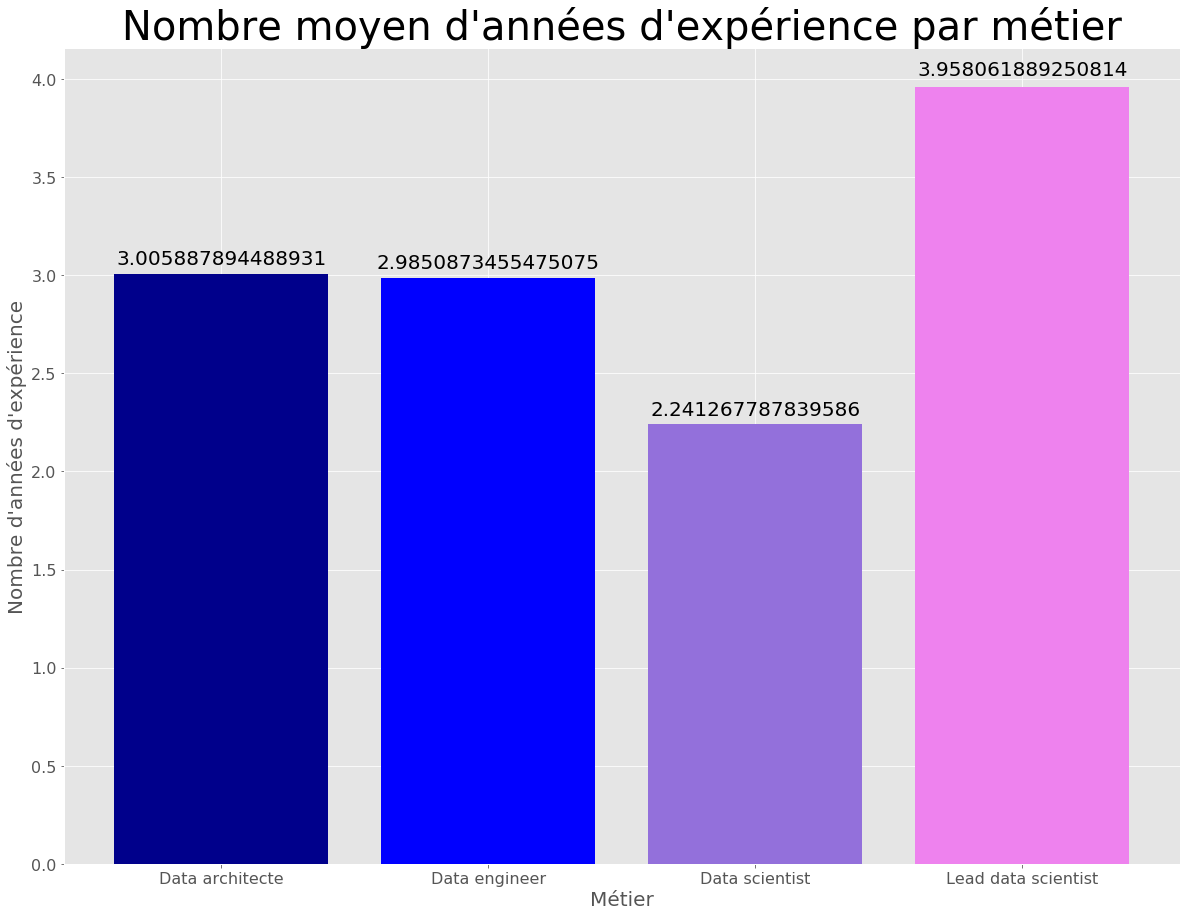

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
fig = plt.bar(x, y, tick_label= x, color = ["darkblue", "blue", "mediumpurple", "violet"])

def autolabel(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                y[idx],
                ha='center', va='bottom', rotation=0, fontsize=20)

autolabel(fig)

plt.title("Nombre moyen d'années d'expérience par métier", fontsize = 40)
plt.xlabel("Métier", fontsize = 20)
plt.ylabel("Nombre d'années d'expérience", fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

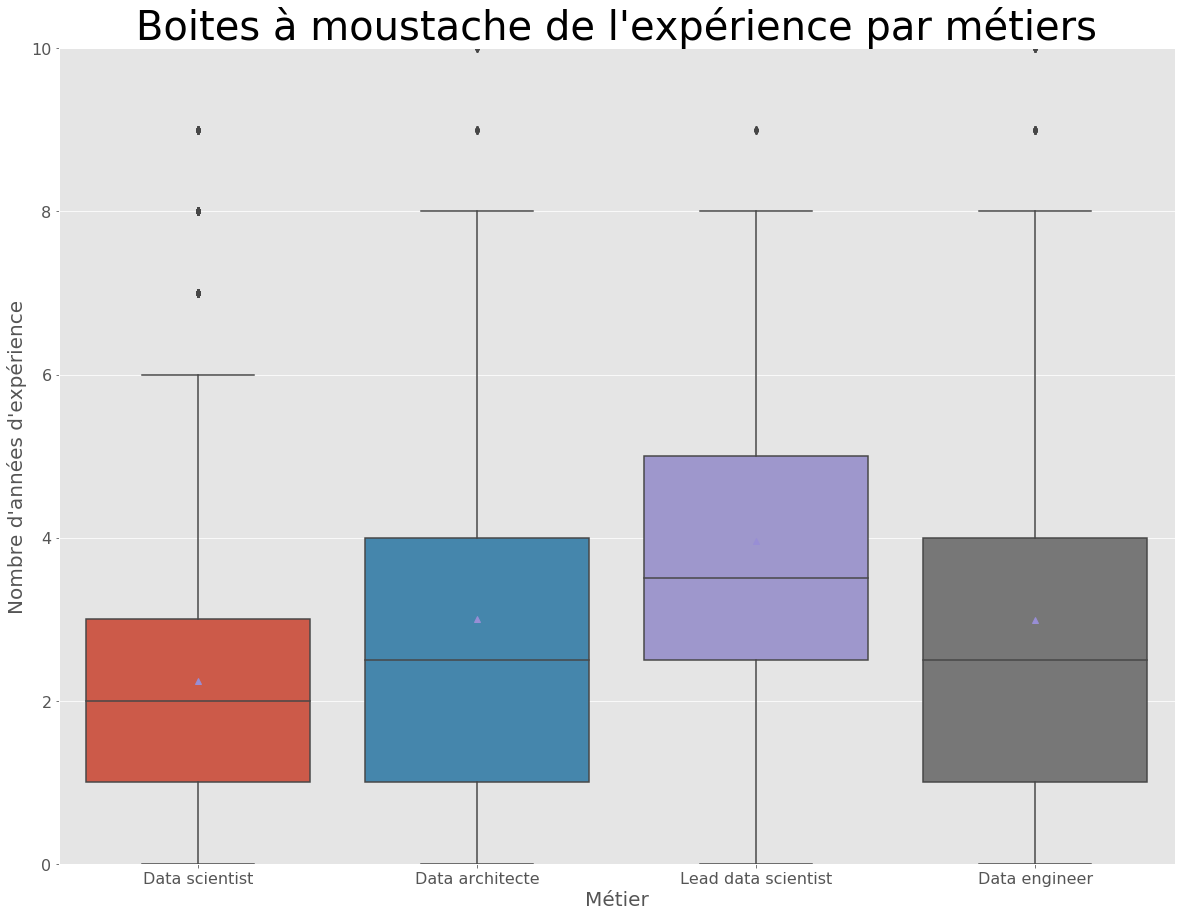

In [19]:
#Affichons les boxplot Métiers/Expérience afin d'avoir une idée de la distribution de l'expérience pour ces catégories
# Pour que ce soit plus lisible, je limite l'expérience de 0 à 10
var = 'Metier'
data = pd.concat([df['Experience'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(20,15))
fig = sb.boxplot(x=var, y="Experience", data=data, showmeans=True)
plt.title("Boites à moustache de l'expérience par métiers", fontsize = 40)
plt.xlabel("Métier", fontsize = 20)
plt.ylabel("Nombre d'années d'expérience", fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 10)
plt.show()

On remarque que les médianes sont à chaque fois en dessous des moyennes. Ceci s'explique par la présence d'outliers (avec un grand nombre d'expériences) qui gonflent la moyenne. C'est particulièrement le cas chez les différents métiers sauf pour les data scientists, car ceux-ci évoluent normalement en Lead data scientist avec l'expérience.

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [20]:
# Regardons des informations sur la répartition de la variable Expérience
df["Experience"].describe()

count    9582.000000
mean        2.814861
std         2.703739
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64

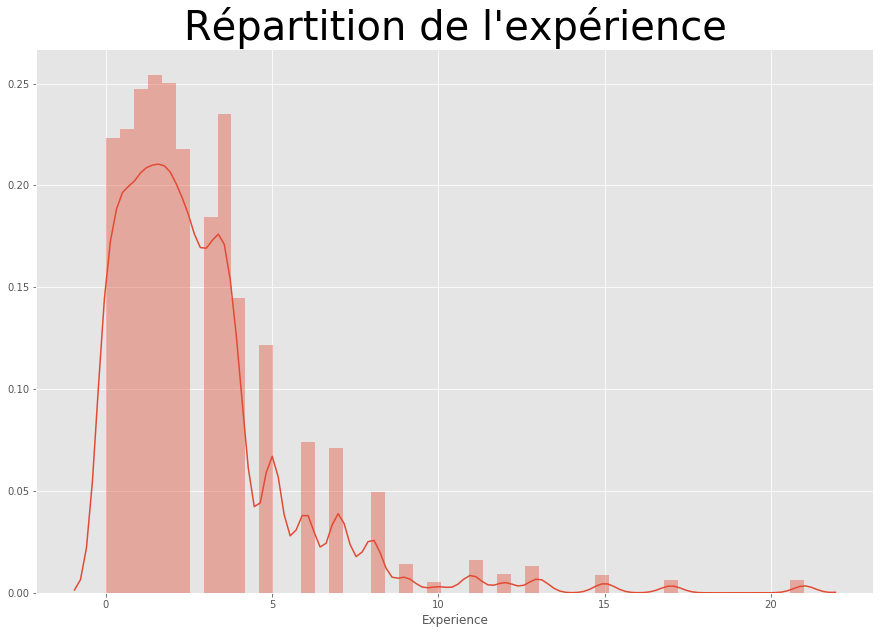

In [21]:
# Affichons le graphe de répartition de la variable Expérience
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Répartition de l'expérience", fontsize = 40)
sb.distplot(df["Experience"].dropna())
plt.show()

On a le choix entre faire une catégorisation **à partir de la connaissance métier** (ici, que signifie être débutant, confirmé etc..?) ou faire une catégorisation par rapport à des hypothèses de répartition des classes, indépendemment de leur signification.
<br>Dans le deuxième cas, différentes méthodes sont possibles afin de garantir que les classes créées sont un peu près égales :
- **La méthode des quantiles :** on obtient alors une équirépartition de la distribution des classes. Les bornes sont alors [1, 2, 3.5]. Cette méthode n'est pas viable ici au vu de la répartition de l'expérience du graphe précédent. (on utiliserait la méthode qcut de pandas) 
- **La méthode des amplitudes :** on prend (max - min) et on divise par le nombre de classes pour avoir les bornes. Les bornes sont alors [5.25, 10.5,15.75]. Comme ici on a des outliers, et qu'on a une très forte concentration entre 0 et 5 ans, on va se retrouver avec des classes très désequilibrées
On va donc faire un **compromis entre ces méthodes**, tout en gardant en tête la signification métier des termes "débutant", "confirmé", "avancé" et "expert". On fait le choix suivant :
**<br>0 < Débutant < 2
<br>2 <= Confirmé < 5
<br>5 <= Avancé < 10
<br>10 <= Expert**
<br>Ceci correspond de plus à une définition classique des niveaux de seniorité

In [22]:
# On utilise la fonction cut qui permet de faire le découpage voulu selon des bornes que l'on définit
bornes = [0,2,5,10,22]
df["Cat_Experience"]=pd.cut(df["Experience"], bornes, labels=["Debutant","Confirme", "Avance", "Expert"], right = False)

In [23]:
# Vérifions si ça a bien fonctionné en affichant la tête du dataframe
df.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Cat_Experience
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Debutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Confirme
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Confirme
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Debutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Confirme
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,Avance
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,Debutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,Confirme
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,Avance
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,Avance


La transformation semble avoir marché correctement

In [24]:
# Regardons la répartition selon les différentes classes
df["Cat_Experience"].value_counts()

Confirme    4156
Debutant    3834
Avance      1329
Expert       263
Name: Cat_Experience, dtype: int64

Le compromis entre amplitude des classes et effectif semble satisfaisante ! On peut supprimer la variable expériance.

In [25]:
# Supression de l'ancienne variable Experience
df = df.drop("Experience", axis=1)

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

La colonne Technologie n'est pas exploitable en l'état. Nous allons créér une colonne par technologie, et remplir par 0 (ne possède pas la compétence) ou 1 (possède la compétence). Ceci va augmenter le nombre de features mais c'est pour moi la meilleure façon d'encoder cette colonne. Dans tous les cas nous utiliserons par la suite get_dummies qui transforme les variables quantitatives de cette façon.
<br>Les étapes de cette transformation sont :
- Découper la colonne Technologies avec le séparateur "/"
- Créer une liste des technologies, supprimer les valeurs aberrantes et les doublons
- Créer un nouveau dataframe au format voulu et le fusionner avec df
- Réponse à la question posée

**- Découper la colonne Technologies avec le séparateur "/"**

In [26]:
# Nous allons faire une première étape intermédiaire consistant à faire un split de la colonne selon le séparateur "/"
df_techno = df["Technologies"].str.split("/", expand = True)
df_techno.head()

,0,1,2,3,4,5,6
0,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,None,None
1,Python,Java,Scala,MongoDB,None,None,None
2,SPSS,SQL,Teradata,R,Python,Tensorflow,scikit-learn
3,C,C++,Java,Python,None,None,None
4,Matlab,Python,C++,numpy,Tensorflow,scikit-learn,None


**- Créer une liste des technologies, supprimer les valeurs aberrantes et les doublons**

In [27]:
liste_technologies = []
for i in df_techno.index:
    for j in df_techno.columns.values:
        if (df_techno.iloc[i,j] not in liste_technologies) & (df_techno.iloc[i,j] != None)  :
            liste_technologies.append(df_techno.iloc[i,j])
liste_technologies

['Matlab',
 'Python',
 'Pyspark',
 'Scikit-learn',
 'Tensorflow',
 'Java',
 'Scala',
 'MongoDB',
 'SPSS',
 'SQL',
 'Teradata',
 'R',
 'scikit-learn',
 'C',
 'C++',
 'numpy',
 'VBA',
 'Excel',
 'PySpark',
 'Linux',
 'Docker',
 'GNU',
 'Hadoop',
 'Hive',
 'MariaDB',
 'machine learning',
 'Spark',
 'AWS',
 'Deep learning',
 'PostgreSQL',
 'Elasticsearch',
 'Kibana',
 'HDFS',
 'Yarn',
 'Microsoft Azure',
 'Redshift',
 'SAS',
 'Machine learning',
 'Anglais',
 'anglais',
 'AI',
 'Scoring',
 'Perl',
 'Ruby',
 'Pycharm',
 'Vertica',
 'Tableau',
 '',
 'Big data',
 'Kafka',
 'ORACLE',
 'MySQL',
 'Cassandra',
 'NoSQL',
 'Matplotlib',
 'Map-Reduce',
 'PIG',
 'HBASE',
 'Windows',
 'NoSQ',
 'Hadoop(HDFS)']

On constate des anomalies :
- Anglais apparait 2 fois, avec et sans majuscule. Elle ne correspond de plus pas à une technologie. Je décide de la supprimer
- Hadoop apparait 2 fois : on considérera que c'est une seule et même compétence
- Il apparait NoSQL et NoSQ qui semble être une faute de frappe : à mettre dans une seule et même compétence
- Le string '' est à supprimer

In [28]:
d = {'NoSQ':'NoSQL','Hadoop(HDFS)':'Hadoop', 'anglais': None, 'Anglais': None, '': None}
df_techno = df_techno.replace(d)

In [29]:
liste_technologies = []
for i in df_techno.index:
    for j in df_techno.columns.values:
        if (df_techno.iloc[i,j] not in liste_technologies) & (df_techno.iloc[i,j] != None)  :
            liste_technologies.append(df_techno.iloc[i,j])
liste_technologies

['Matlab',
 'Python',
 'Pyspark',
 'Scikit-learn',
 'Tensorflow',
 'Java',
 'Scala',
 'MongoDB',
 'SPSS',
 'SQL',
 'Teradata',
 'R',
 'scikit-learn',
 'C',
 'C++',
 'numpy',
 'VBA',
 'Excel',
 'PySpark',
 'Linux',
 'Docker',
 'GNU',
 'Hadoop',
 'Hive',
 'MariaDB',
 'machine learning',
 'Spark',
 'AWS',
 'Deep learning',
 'PostgreSQL',
 'Elasticsearch',
 'Kibana',
 'HDFS',
 'Yarn',
 'Microsoft Azure',
 'Redshift',
 'SAS',
 'Machine learning',
 'AI',
 'Scoring',
 'Perl',
 'Ruby',
 'Pycharm',
 'Vertica',
 'Tableau',
 'Big data',
 'Kafka',
 'ORACLE',
 'MySQL',
 'Cassandra',
 'NoSQL',
 'Matplotlib',
 'Map-Reduce',
 'PIG',
 'HBASE',
 'Windows']

In [30]:
len(liste_technologies)

56

**- Créer un nouveau dataframe au format voulu et le fusionner avec df**

In [31]:
# Créons la nouvelle matrice de technos
matrix_techno = np.zeros((9582,56), dtype = np.int8)

for p in range(56):
    for n in range(9582):
        for i in range(7):
            if df_techno.iloc[n,i] == liste_technologies[p]:
                matrix_techno[n,p] = 1   

In [32]:
df_techno_final = pd.DataFrame(matrix_techno, columns = liste_technologies)

In [33]:
df_techno_final.head(20)

,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,...,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On a obtenu ce qu'on voulait, à savoir un dataframe avec en colonne les technologies et remplit de 1 ou 0 selon que la personne maitrise la technologie ou non. Il ne reste plus qu'à l'intégrer à notre dataframe

In [34]:
# On garde le dataframe df plus lisible et on en créé un autre
df_full_technos = df.copy()
for i in range(56):
    df_full_technos[liste_technologies[i]] = df_techno_final[liste_technologies[i]]

In [35]:
# Vérifions si ça a fonctionné
df_full_technos.head()

,Entreprise,Metier,Technologies,Diplome,Ville,Cat_Experience,Matlab,Python,Pyspark,Scikit-learn,...,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,Paris,Debutant,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,Marseille,Confirme,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,Nantes,Confirme,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,Marseille,Debutant,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,Bordeaux,Confirme,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Très bien, maintenant qu'on a obtenu ce qu'on voulait, on peut supprimer la colonne "Technologies"

In [36]:
df_full_technos = df_full_technos.drop('Technologies', axis=1)

**- Réponse à la question posée**

In [37]:
# On peut maintenant afficher facilement le top 5 des technologies
top5_techno = df_full_technos.sum(axis=0).sort_values(ascending = False).head(5)
top5_techno

Python    6627
R         4374
SQL       2581
Java      1719
Hadoop    1687
dtype: int64

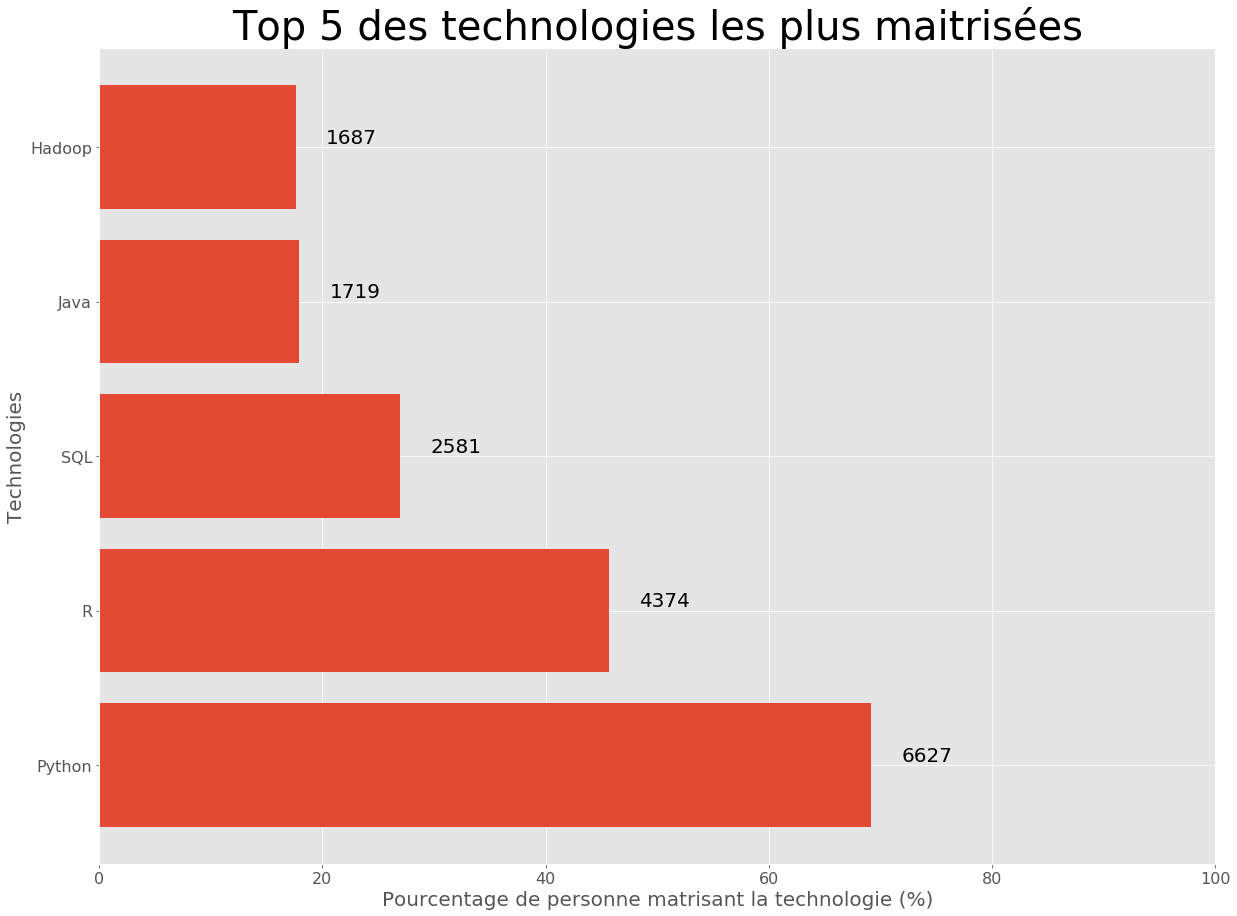

In [38]:
# Faisons maintenant un graphe pour les représenter
y = top5_techno.values
y_pourcent = y/9582*100
x = top5_techno.index.values

fig, ax = plt.subplots(figsize=(20,15))
fig = plt.barh(x, y_pourcent, orientation ='horizontal')

def autolabel(rects):
    for idx,rect in enumerate(rects):
        width = rect.get_width()
        ax.text(5+width, rect.get_y() + rect.get_height()/2,
                y[idx],
                ha='center', va='bottom', rotation=0, fontsize=20)

autolabel(fig)

plt.title("Top 5 des technologies les plus maitrisées", fontsize = 40)
plt.xlabel("Pourcentage de personne matrisant la technologie (%)", fontsize = 20)
plt.ylabel("Technologies", fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 100)
plt.show()

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

Procédons par étape
- Complétude des données manquantes restantes
- Résolution des Outliers
- Encodage des variables qualitatives
- Choix de la méthode et de la métrique associée
- Comparaison et choix du modèle

**- Données manquantes restantes**

In [39]:
#Tableau affichant les données manquantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcentage (%)'])
missing_data.head()

,Total,Pourcentage (%)
Metier,19,0.198288
Entreprise,17,0.177416
Cat_Experience,0,0.000000
Ville,0,0.000000
Diplome,0,0.000000


In [40]:
# Concernant l'entreprise, affichons les principales occurences
df_full_technos["Entreprise"].value_counts()

Ball Aerospace                         748
KPMG                                   132
Amazon.com                             127
Brigham & Women's Hospital(BWH)        115
Google                                 112
McKinsey & Company                     110
University of Texas at Austin           92
Wayfair                                 84
Massachusetts General Hospital(MGH)     83
Jacobs                                  80
Vertex Pharmaceuticals                  68
Tempus                                  66
Burns & McDonnell                       66
Civis Analytics                         65
Harvard University                      63
Vertex                                  63
Takeda Pharmaceutical                   62
Harnham                                 61
Georgia Tech Research Institute         60
ICF                                     60
Emory University                        60
Dana-Farber Cancer Institute            60
The Home Depot                          52
Broad Insti

Etant donné la disparité des valeurs de cette colonne, pas sur qu'elle apporte beaucoup d'information. De plus, lorsque je vais faire l'encodage, comme il y a 1382 valeurs, le nombre de features va exploser ce qui risquerait d'augmenter grandement le temps de calcul. Mais, dans un premier temps, pour ne perdre aucune information, je décide de garder cette colonne et de remplacer les valeurs manquantes par la plus forte occurence

In [41]:
# on compléte par la plus forte occurence
df_full_technos["Entreprise"].fillna(df["Entreprise"].value_counts().index[0], inplace=True)

In [42]:
# Concernant le métier, on compléte par la plus forte occurence. On créé un nouveau dataframe afin de laisser les métiers vides pour la classification de la question suivante
df_clustering = df_full_technos.copy()
df_clustering["Metier"].fillna(df["Metier"].value_counts().index[0], inplace= True)

In [43]:
#Tableau affichant les données manquantes
total = df_clustering.isnull().sum().sort_values(ascending=False)
percent = (df_clustering.isnull().sum()/df_clustering.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcentage (%)'])
missing_data.head()

,Total,Pourcentage (%)
Windows,0,0.0
MariaDB,0,0.0
Hadoop,0,0.0
GNU,0,0.0
Docker,0,0.0


C'est bon il n'y a plus de données manquantes !

**- Outliers**

Il ne semble pas y avoir de données aberrantes. Je ne supprime aucune valeur

**- Encodage des variables qualitatives**

J'utilise la très puissante méthode get_dummies de pandas

In [44]:
df_clustering = pd.get_dummies(df_clustering)
df_clustering.head()

,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,...,Ville_Paris,Ville_Rennes,Ville_Rouen,Ville_Strasbourg,Ville_Toulon,Ville_Toulouse,Cat_Experience_Debutant,Cat_Experience_Confirme,Cat_Experience_Avance,Cat_Experience_Expert
0,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**- Choix de la méthode et de la métrique associée**

Etant donné la taille de l'échantillon, on pourrait soit choisir un kmean soit un mini batch kmean. Testons les 2 afin de choisir celui qui obtient les meilleurs performances.
ressource : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

On évaluera les résultats de l'algorithme avec la méthode de l'inertie qu'il faut minimiser. Cette méthode permet d'évaluer combien les points sont loins les uns des autres au sein d'un même cluster.

**- Comparaison et choix du modèle**

In [45]:
# Evaluation pour KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state = 32)
kmeans.fit_predict(df_clustering)
kmeans.inertia_

62338.59648951426

In [46]:
# Evaluation pour Mini Batch KMeans
from sklearn.cluster import MiniBatchKMeans
minikmeans = MiniBatchKMeans(2, random_state = 32)
minikmeans.fit_predict(df_clustering)
minikmeans.inertia_

62351.769240624344

On constate qu'on obtient des valeurs d'inertie assez importantes. C'est normal car on a beaucoup d'observations mais peu de clusters. Les résultats sont sensiblement identitiques. Je choisis la méthode KMeans.

**- Analyse des résultats**

In [47]:
# Visualisons les clusters créés afin d'avoir une intuition de ce qui s'est passé
df_clusters = df
df_clusters['cluster'] = kmeans.labels_
df.head(20)

,Entreprise,Metier,Technologies,Diplome,Ville,Cat_Experience,cluster
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,Paris,Debutant,0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,Marseille,Confirme,1
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,Nantes,Confirme,0
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,Marseille,Debutant,0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,Bordeaux,Confirme,0
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,Lille,Avance,0
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,Lille,Debutant,0
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,Toulouse,Confirme,0
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,Paris,Avance,1
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,Toulouse,Avance,1


A première vu, il semblerait que le cluster 1 correspond aux data engineers et data architectes et le cluster 0 aux data scientists et lead data scientists

In [48]:
# Vérifions l'intuition précédente
df_clusters.groupby("Metier")["cluster"].sum()

Metier
Data architecte        2123
Data engineer          2347
Data scientist            0
Lead data scientist      22
Name: cluster, dtype: int32

In [49]:
df_clusters["Metier"].value_counts()

Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: Metier, dtype: int64

Ces 2 tableaux nous permettent de constater que :
- Le cluster 1 correspond aux data architecte et engineer (excepté 22 lead data scientists)
- Le cluster 0 correspond aux data scientists et lead data scientists

Notre clustering semble avoir très bien fonctionné et détecté une distinction entre data engineer et architecte d'un côté, data scientists de l'autre. Ceci est compréhensible : data scientist et lead data scientist sont les mêmes métiers avec un niveau de séniorité différents, ce sont donc des profils similaires. Data engineer et data architect ont tous les 2 besoin d'avoir des notions d'archtitecture, d'où le fait qu'ils se retrouvent dans le même cluster. On pourrait vérifier sur les 22 lead data scientist "mal tagués" leur profil. Mon intuition est qu'ils ont un profil hybride et qu'ils ont développé au fil du temps à la fois des compétences de data science mais aussi de data engineering, d'où leur mauvais taggage.

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

Les étapes setont les suivantes :
- Définition de la fonction d'évaluation
- Split du dataframe
- Comparaison de 3 modèles et choix
- Prédiction des individus non étiquetés

**- Fonction d'évaluation**

In [50]:
#Création de la fonction d'évaluation pâr validation croisée
from sklearn.model_selection import KFold, cross_val_score
n_folds = 5

def score_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    score = cross_val_score(model, X, y, cv = kf)
    return("score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

**- Split du dataframe**

In [51]:
# Split du dataframe
y = df_full_technos["Metier"].dropna().values

In [52]:
# On applique get_dummies comme précédemment et on transforme en array
X = pd.get_dummies(df_full_technos)

In [53]:
# Split de X
condition_pas_de_metier = (X["Metier_Data scientist"]==0) & (X["Metier_Lead data scientist"]==0) & (X["Metier_Data architecte"]==0) & (X["Metier_Data engineer"]==0) 
X_predict = X.loc[condition_pas_de_metier].drop(["Metier_Data scientist", "Metier_Lead data scientist", "Metier_Data architecte", "Metier_Data engineer"], axis=1)
X = X.loc[condition_pas_de_metier == False].drop(["Metier_Data scientist", "Metier_Lead data scientist", "Metier_Data architecte", "Metier_Data engineer"], axis=1)

**- Comparaison de 3 modèles et choix**
<br>Je teste ici 3 modèles classiques : les k plus proches voisins, le SVM et la régression logistique.
<br>Pour chacun de ces modèles, j'effectue une gridsearchCV afin de déterminer les meileurs hyperparamètres (vu les temps de calculs de ma machine, j'optimise seulement les paramètres principaux mais une piste d'amélioration serait de jouer avec plus d'hyperparamètres). Une fois les paramètres déterminés, je calcule le score avec une validation croisée.

- k plus proches voisins

In [54]:
# On fait un gridsearch afin de trouver les meilleurs hyperparamètres
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Le gridsearchcv met du temps à fonctionner, je mets donc en commentaire pour éviter de refaire le calcul à chaque fois.
# Le meilleur paramètre est : 
#params = {'n_neighbors' : [3,5,7,9],
#         'weights' : ['uniform','distance']}
#gridsearch_knn = GridSearchCV (KNeighborsClassifier(), params, cv=5)
#gridsearch_knn.fit(X, y)
#print ("Meilleurs parametres: ", gridsearch_knn.best_params_)

In [55]:
knn = KNeighborsClassifier(n_neighbors=9)
score_cv(knn)

'score: 0.8670 (0.0038)'

- SVM

In [56]:
# On fait un gridsearch afin de trouver les meilleurs hyperparamètres
from sklearn.svm import LinearSVC

# Le meilleur paramètre après exécution du code est 0.01

#params = {'C' : [0.001,0.01,0.1,1,10,100,1000]}
#gridsearch_SVC = GridSearchCV (LinearSVC(), params, cv=5)
#gridsearch_SVC.fit(X, y)
#print ("Meilleurs parametres: ", gridsearch_SVC.best_params_)

In [57]:
svc = LinearSVC (C=0.01)
score_cv(svc)

'score: 0.8814 (0.0033)'

- Regression logistique

In [58]:
from sklearn.linear_model import LogisticRegression

# Meilleur paramètre : C=1

#params = {'C' : [0.001,0.01,0.1,1,10,100,1000]}
#gridsearch_logistic = GridSearchCV (LogisticRegression(), params, cv=5)
#gridsearch_logistic.fit(X, y)
#print ("Meilleurs parametres: ", gridsearch_logistic.best_params_)

In [59]:
logistic = LogisticRegression (C=1)
score_cv(logistic)

C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linea

'score: 0.8923 (0.0046)'

- Analyse des résultats et choix du modèle

On remarque que les résultats sont globalement bons et varient entre 85% et 90% d'accuracy, ce qui est un bon score pour un modèle simple.
<br>Les meilleurs résultats sont obtenus avec la régression logistique. C'est donc ce modèle qu'on va retenir.
<br>Pour améliorer les résultats, on pourrait continuer le feature engineering et optimiser plus en détail les hyperparamètres.

**- Prédiction des individus non étiquetés**

In [60]:
logistic.fit(X,y)
y_predict = logistic.predict(X_predict)
y_predict

C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Moreau Adrien\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Data engineer', 'Lead data scientist', 'Data scientist',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Data scientist', 'Lead data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data engineer',
       'Data architecte', 'Data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Data scientist'], dtype=object)

### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix


**Hypothèse 1 :** 
<br>L'entreprise concernée possède une CVthèque de ses employés et cette entreprise est assez grande pour que les principales branches de métiers (en rapport avec le poste à pourvoir, en partant du principe que les candidatures sont logiques) soient bien représentées. On pourrait alors partir sur une méthode supervisée de classification en utilisant comme jeu d'entrainement les CV des employés déjà labelisés, puis en prédisant les CV de la campagne de recrutement non labélisés

**Hypothèse 2 :** 
<br>L'entreprise n'a pas accès facilement aux CV de ses employés mais elle possède des fiches de poste par métier. On suppose aussi que cette entreprise est assez grande pour que les principales branches de métiers soient bien représentées. Même méthode que précédemment avec à la place de la CVthèque les fiches de poste.

**Hypothèse 3 :**
<br>Pas de CVthèque, pas de fiches de postes ou entreprise trop petite. Dans ces cas-là, on partira sur une approche non supervisée en faisant un clustering des CV, puis en regardant quelques CV pour chaque cluster afin de déterminer le métier du cluster, ce qui n'automatise pas complétement la tache comme pour les 2 autres hypothèses, mais qui permet un grand gain de temps de labelisation.
<br> Une autre possibilité qui me parait beaucoup plus complexe serait de se baser une base open source de CV avec un API. Mais encore faut-il trouver une base, et qu'elle soit cohérente par rapport aux métiers visés (on ne souhaite par exemple par avoir des CV du milieu médical si l'entreprise est dans le BTP). Je n'explorerai pas cette possibilité qui me semble trop complexe pour un simple problème de labélisation de CV.

## Etapes du projet

### 1) Cadrage du projet & Collecte des données

- Voir avec les métiers dans quelle hypothèse on se trouve et **définir précisément le besoin** et son **scope** (par exemple, langue des CV que en français ou aussi en anglais, etc...)
- **Collecter les données** (CV, fiches de poste, extract du SIRH pour les métiers des employés...)
- Tout **centraliser dans une base de données**
<br>*Bien s'assurer que le scope du projet est délimité et vérifier qu'on a les data pour répondre au problème, sinon pas de projet*

### 2) Preprocessing des data

Quelque soit l'hypothèse dans laquelle on se trouve, on a un corpus de textes a cleaner avant d'appliquer tout algorithme de Machine Learning. Ce cleaning va permettre de réduire considérablement le nombre de dimension afin de palier au fléau de la dimension
On suppose tous les documents en PDF.
- **Extraction du contenu des CV** à l'aide du parser de la librairie Tika
- **Extraction des mots** de chaque texte à partir de RegExpTokeniser de la librairie NLTK
- **Suppression des stop_words**. On utilise pour cela la méthode get_stop_words librairie stop_words qui a l'avantage de pouvoir choisir les stop_words dans la majorité des langues dont le francais.
<br>Afin de compléter cette liste de stop_words avec des mots inutiles et spécifiques au corpus, on peut également supprimer les mots qui apparaissent plus d'une certaine occurence et moins d'une certaine occurence. On élimine ainsi les mots qui apparaissent trop ou trop peu pour différencier les CV entre eux
- **Mise en minuscule des mots** afin de compter pour un même mot "ANGLAIS" et "anglais" (méthode lower())
- **Suppression des accents**
- **Stemming ou Lemmatisation** : il s'agit de prendre la racine des mots. La méthode de stemming est la plus simple, je commencerais par celle-là, en testant éventuellement dans un second temps la lemmatisation afin de voir si ça améliore les performances du modèle. Méthode FrenchStemmer() de la librairie nltk.
- **n-grams (optionnel)** : on peut tester, peut être dans un second temps, si la création de n_grams améliore les résultats. Cette méthode consiste à rassembler n mots consécutifs (on choisit souvent n= 2 ou 3). Ceci permet par exemple de consider "Machine Learning" comme une même notion et non pas de le séparer en "machine" et "learning"
- **Format final en input des algorithmes : Bag of Words, TF-IDF ou plongement de mots (Word2Vec)**. Le choix de l'une ou l'autre de ces méthodes dépend du choix du modèle qui sera fait. Certains algorithmes sont plus performants avec un Bag of Words en entrée, d'autres avec le TF-IDF

### 3) Définition de la méthode de validation

Afin de comparer les modèles et d'évaluer leurs performances, il faut choisir une méthode d'évaluation à l'aide d'une métrique. 
- **Supervisé** : On pourra afficher la matrice de confusion et afficher les différntes métriques possibles : accuracy, précision etc... C'est avec le métier qu'il faudra déterminer la bonne métrique.
- **Non supervisé** : On pourra choisir l'inertie (comme vu à la question 8.)

### 4) Test & choix du modèle

On choisira une méthode fortement régularisée (pour éviter le surapprentissage, la colinéarité,…) et capable techniquement d’appréhender les grandes dimensions.
<br>Plusieurs modèles parmis ceux cités ci-dessous pourront être testés afin de sélectionner celui ayant les meilleurs résultats
- **Supervisé** : SVM en jouant sur le paramètre de coût, , classieurs linéaires régularisés (Ridge, Lasso, ElasticNet) en jouant sur la paramètre de régularisation, réseaux de neurones (RNN, LSTM Networks)
<br>*Pour les réseaux de neurones, beaucoup de tests sont nécessaires avant d'obtenir des résultats probants et stables, notamment pour déterminer la valeur des hyperparamètres (nombre & taille des calques, learning rate, algorithme de gradient utilisé, etc)*
- **Non supervisé** : KMeans, clustering hierarchique
<br>*Le choix du nombre de cluster se fera en optimisant la fonction de validation, mais aussi en validant avec les métiers*
<br> Il suffira par la suite de regarder 1 ou 2 CV de chaque cluster pour déterminer le métier de ce cluster

### 5) Amélioration des résultats en faisant du feature engineering

On pourra par exemple tester si les n-grams améliorent les résultats, affiner la sélection des stop_words, appliquer la lemmatisation et non le stemming... L'objectif étant de voir si on améliore les performances du modèle.

### 6) Mise en production

La méthode de mise en production et le rendu du livrable final dépend du besoin. Est-ce qu'on veut une application qui à partir de CV donne directement le résultat?
Est-ce que le script va directement être utilisé par le métier pour faire les prédictions?
Il faudra répondre à ces questions afin de déterminer le meilleur outil. Il y aura potentiellement besoin de data engineer ou data architecte pour cette phase.
Le temps de calcul est très important à prendre en compte à cette étape, même s'il a normalement été pris en compte par le choix des méthodes précédentes.